In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
header = ["cn", "hndcpInfnt", "wpcs","abr","phff","esa","rgschool","antiSatBan","anc","mxMissl","immgr","scc","eduspen","supRS","crime","duty","export"]
votes = pd.read_csv('house-votes-84.data',names=header)
votes.head()
votes.describe()


,cn,hndcpInfnt,wpcs,abr,phff,esa,rgschool,antiSatBan,anc,mxMissl,immgr,scc,eduspen,supRS,crime,duty,export
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [3]:
# remove ? and replace y and n
for a in header:
    votes=votes[votes[a]!='?']

votes=votes.replace('y',1)
votes=votes.replace('n',0)
votes.head()


,cn,hndcpInfnt,wpcs,abr,phff,esa,rgschool,antiSatBan,anc,mxMissl,immgr,scc,eduspen,supRS,crime,duty,export
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [4]:
from sklearn.model_selection import train_test_split 
X=votes.values[:,1:16]
Y=votes.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier

#model = LogisticRegression()
model=DecisionTreeClassifier(criterion ="entropy", max_depth=15 , splitter="best" , min_impurity_split=0.1 )
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
h = model.predict(X_test)
print("Train Accuracy is ", accuracy_score(y_train,y_train_pred)*100)
print("Test Accuracy is ", accuracy_score(y_test,h)*100)


Train Accuracy is  99.45945945945947
Test Accuracy is  93.61702127659575


C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


# 1.Filter Feature Selection

## 1.1. Correlation filtering 

In [8]:
from sklearn.feature_selection import VarianceThreshold


correlated_features=set()
correlationMatrix=votes.corr()
#print(correlation_matrix)
listAccTrain=[]
listAccTest=[]
seuil=0.8
seuils=[]

for j in range (7):
    for i in range(len(correlationMatrix.columns)):
        for j in range(i):
            if abs(correlationMatrix.iloc[i,j])>=seuil:
                colname=correlationMatrix.columns[i]
                correlated_features.add(colname)
        

    #print(correlated_features)
    correlated_features.pop()
    print("seuil : ")
    print(seuil)
    print("correlated features : ",correlated_features)
    print("\n")
    votes2=votes
    #remove correlated features
    ii=0
    for n in correlated_features :
        votes2=votes2.drop(n,axis=1)
        ii+=1
    
    size=16-ii
    X2=votes2.values[:,1:size]
    Y2=votes2.values[:,0]
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=0)
    
    model2 = DecisionTreeClassifier(criterion ="entropy", max_depth=25 , splitter="best" , min_impurity_split=0.1 )
    model2.fit(X_train2, y_train2)
    y_train_pred = model2.predict(X_train2)
    h = model2.predict(X_test2)
    
    seuils.append(seuil)
    listAccTrain.append(accuracy_score(y_train2,y_train_pred))
    listAccTest.append( accuracy_score(y_test2,h) )
    seuil-=0.1

print("les seuils :")
print(seuils)
print("\n")
print("Train Accuracies ")
print(listAccTrain)
print("\n")
print("Test Accuracies ")
print(listAccTest)



seuil : 
0.8
correlated features :  {'mxMissl'}


seuil : 
0.7000000000000001
correlated features :  {'crime', 'eduspen', 'anc', 'mxMissl'}


seuil : 
0.6000000000000001
correlated features :  {'crime', 'esa', 'supRS', 'eduspen', 'anc', 'rgschool', 'antiSatBan', 'mxMissl'}


seuil : 
0.5000000000000001
correlated features :  {'crime', 'duty', 'esa', 'phff', 'eduspen', 'anc', 'rgschool', 'antiSatBan', 'mxMissl'}


seuil : 

C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_i


0.40000000000000013
correlated features :  {'crime', 'export', 'duty', 'esa', 'phff', 'supRS', 'anc', 'rgschool', 'antiSatBan', 'mxMissl'}


seuil : 
0.30000000000000016
correlated features :  {'crime', 'export', 'duty', 'esa', 'abr', 'phff', 'supRS', 'eduspen', 'rgschool', 'antiSatBan', 'mxMissl'}


seuil : 
0.20000000000000015
correlated features :  {'crime', 'export', 'duty', 'esa', 'abr', 'scc', 'phff', 'supRS', 'eduspen', 'anc', 'antiSatBan', 'mxMissl'}


les seuils :
[0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015]


Train Accuracies 
[0.9945945945945946, 0.9945945945945946, 0.9891891891891892, 0.9081081081081082, 0.8540540540540541, 0.8324324324324325, 0.7243243243243244]


Test Accuracies 
[0.9361702127659575, 0.9361702127659575, 0.9148936170212766, 0.8723404255319149, 0.851063829787234, 0.9148936170212766, 0.8085106382978723]


C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


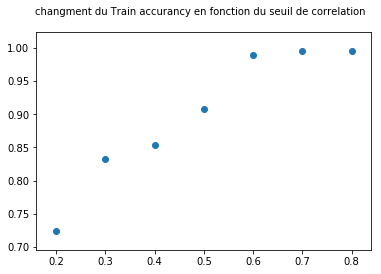

In [9]:
listAccTrain = np.asarray(listAccTrain)
seuils = np.asarray(seuils)

listAccTrain = listAccTrain[:,np.newaxis]
seuils = seuils[:,np.newaxis]
plt.title("changment du Train accurancy en fonction du seuil de correlation  \n ",fontsize=10)
plt.scatter(seuils,listAccTrain)

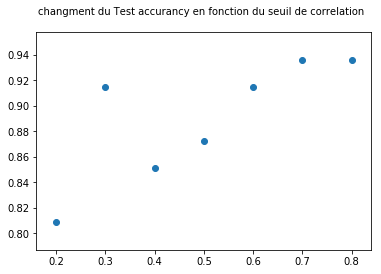

In [10]:
listAccTest = np.asarray(listAccTest)

listAccTest = listAccTest[:,np.newaxis]
plt.title("changment du Test accurancy en fonction du seuil de correlation  \n ",fontsize=10)
plt.scatter(seuils,listAccTest)

# 2.Wrapper Feature Selection

## 2.1.Exhaustive Feature Selection

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

X=votes.values[:,1:16]
Y=votes.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
model = KNeighborsClassifier(n_neighbors=3)
efs = EFS(model, 
           min_features=1,
           max_features=X_train.shape[1],
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs = efs.fit(X_train, y_train)
print('Best accuracy score: %.2f' % efs.best_score_)
print('index of best features:', efs.best_idx_)
bestFeaturesNames=[]
for a in efs.best_idx_:
    bestFeaturesNames.append(header[a])
print("best features :",bestFeaturesNames)


Features: 32767/32767

Best accuracy score: 0.98
index of best features: (0, 3, 10, 12)
best features : ['cn', 'abr', 'immgr', 'eduspen']


In [12]:

# test de precision apres la selection d attributs
votes3=votes
for n in header:
    if n not in bestFeaturesNames:
        votes3=votes3.drop(n,axis=1)

X=votes3.values[:,1:len(bestFeaturesNames)]
Y=votes3.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

model = DecisionTreeClassifier(criterion ="entropy", max_depth=15 , splitter="best" , min_impurity_split=0.1 )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
h = model.predict(X_test)
    
print("Train Accuracy is ", accuracy_score(y_train,y_train_pred)*100)
print("Test Accuracy is ", accuracy_score(y_test,h)*100)

Train Accuracy is  85.94594594594595
Test Accuracy is  87.2340425531915


C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
